In [10]:
import torch
from utils import *
from models import *
import argparse
import torch.nn.functional as F

device = 'cuda'
torch.cuda.set_device(4)

In [2]:
train_iterator, valid_iterator, test_iterator, TEXT = get_SSTdata()

In [4]:
DROPOUT = 0
HIDDEN_DIM = 256
num_epochs = 5
lr = 0.001
N_FILTERS = 64
FILTER_SIZES = 1
    
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 300
OUTPUT_DIM = 5
PAD_IDX = TEXT.vocab.stoi[TEXT.pad_token]

model = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX).to(device)

model = RNN(INPUT_DIM, EMBEDDING_DIM,DROPOUT, HIDDEN_DIM, OUTPUT_DIM).to(device)

In [5]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters())

criterion = nn.CrossEntropyLoss()

In [6]:
history = train_eval(model, train_iterator, valid_iterator, 10, optimizer, criterion ,device)

Beginning to Train
Training: epoch: [1/10] Loss: [1.35] Accuracy [37.78] Eval: Loss: [1.03] Accuracy[51.68]
Training: epoch: [2/10] Loss: [1.07] Accuracy [45.19] Eval: Loss: [1.02] Accuracy[52.77]
Training: epoch: [3/10] Loss: [1.04] Accuracy [47.03] Eval: Loss: [1.01] Accuracy[54.59]
Training: epoch: [4/10] Loss: [1.01] Accuracy [50.11] Eval: Loss: [1.00] Accuracy[50.50]
Training: epoch: [5/10] Loss: [1.01] Accuracy [51.23] Eval: Loss: [0.98] Accuracy[56.13]
Training: epoch: [6/10] Loss: [0.98] Accuracy [53.60] Eval: Loss: [0.97] Accuracy[56.13]
Training: epoch: [7/10] Loss: [0.95] Accuracy [56.20] Eval: Loss: [0.95] Accuracy[56.49]
Training: epoch: [8/10] Loss: [0.92] Accuracy [58.31] Eval: Loss: [0.94] Accuracy[56.95]
Training: epoch: [9/10] Loss: [0.87] Accuracy [61.65] Eval: Loss: [0.93] Accuracy[56.58]
Training: epoch: [10/10] Loss: [0.84] Accuracy [63.48] Eval: Loss: [0.92] Accuracy[57.58]


In [7]:
test(model,test_iterator,criterion,device)

TESTING
Testing: Loss: [0.88] Accuracy [61.86]


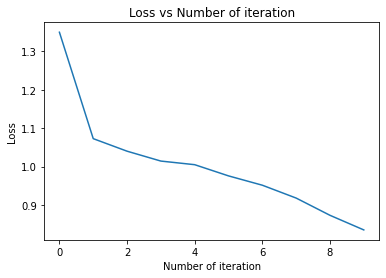

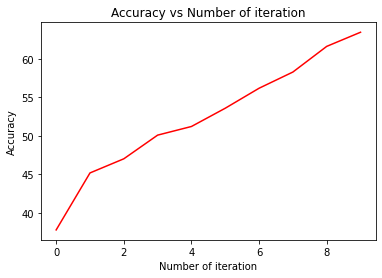

In [8]:
visualize_train(history)

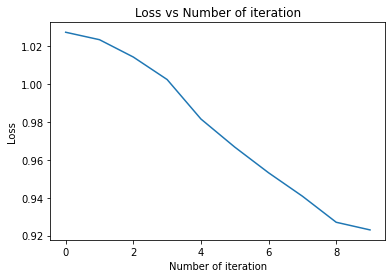

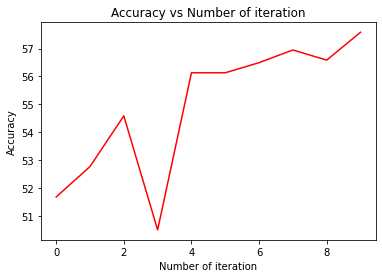

In [9]:
visualize_eval(history)